In [43]:
# import the modules
import numpy as np
import geopandas as gp
import pandas as pd
import os
import json
import matplotlib.pyplot as plt
import pylab as pl
%pylab inline
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf

Populating the interactive namespace from numpy and matplotlib


In [3]:
# seed the random
myseed = np.random.seed(201510)
myseed

In [4]:
# load the data with GeoDataFrame
nrg = gp.GeoDataFrame.from_csv(os.getenv('PUI2015')+'/HW5/Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv')

In [5]:
# have a simple visual of the data
#print nrg.columns
#print nrg.describe()

In [6]:
bsize = gp.GeoDataFrame.from_file(os.getenv('PUI2015')+'/HW5/Manhattan/MNMapPLUTO.shp')
#print bsize.columns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1330dbed0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12db75cd0>]], dtype=object)

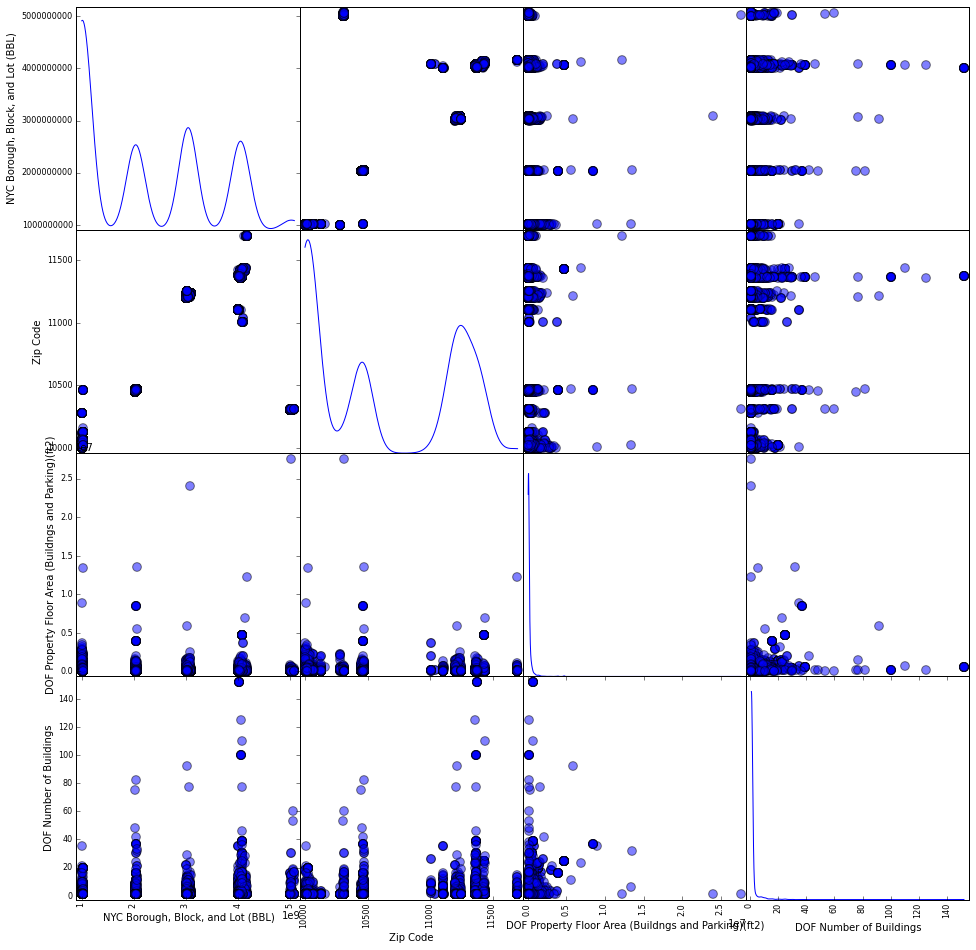

In [7]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix (nrg, s=300, figsize=(16, 16), diagonal='kde')

In [8]:
def canconvert(mydata):
    try :
        float(mydata)
        return True
    except ValueError:
        return False

Create the array here:

In [9]:
nrg['energy'] = nrg['Site EUI(kBtu/ft2)'].convert_objects(convert_numeric=True)
nrg['area'] = nrg['Reported Property Floor Area (Building(s)) (ft²)'].convert_objects(convert_numeric=True)

In [10]:
#nrg.energy.astype(float)
#nrg.area.astype(float)

In [11]:
nrg['BBL'] = nrg['NYC Borough, Block, and Lot (BBL)']

In [12]:
# merge the table file with the shape file
BBLmerge = pd.merge(nrg, bsize, on='BBL')

/Users/eliseowang/anaconda/lib/python2.7/site-packages/pandas/core/index.py:1695: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  indexer = self._engine.get_indexer(target.values)
/Users/eliseowang/anaconda/lib/python2.7/site-packages/pandas/core/index.py:1049: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  return key in self._engine


In [13]:
BBLmerge['Building Energy Consumption'] = BBLmerge['energy']*BBLmerge['area']

/Users/eliseowang/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


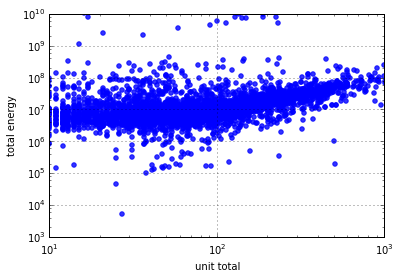

In [14]:
BBLmerge.plot(kind='scatter', x='UnitsTotal', y='Building Energy Consumption', color='b', alpha=0.8, loglog=True)
#plt.scatter(x=np.log10(BBLmerge['UnitsTotal']),y=np.log10(BBLmerge['Building Energy Consumption']),linestyle='o', color='b', alpha=0.8)
# i start from 10 here because the scores under 10 looks bad
pl.xlim([10, 1000])
pl.ylim([1000, 1e10])
pl.xlabel('unit total')
pl.ylabel('total energy')
pl.grid()
pl.legend()

In [15]:
BBLcut = BBLmerge[(BBLmerge['Building Energy Consumption']>=1000)&(BBLmerge['Building Energy Consumption']<1e+10)
                  & (BBLmerge['UnitsTotal']>=1)&(BBLmerge['UnitsTotal']<1000)]

In [97]:
# X = sm.add_constant(BBLcut['UnitsTotal'].apply(log10))
# Y = BBLcut['Building Energy Consumption'].apply(log10)
# x1 = BBLcut['UnitsTotal'].apply(log10)
# data1 = pd.DataFrame()
# data1['BEC'] = BBLcut['Building Energy Consumption']
# data1['UT'] = BBLcut['UnitsTotal']
# myfit = smf.ols(formula = 'Y ~ X-1', data=data1).fit() # missing='drop').fit() # ignores entires where x or y is NaN
# print myfit.summary()
# print myfit.params
X = sm.add_constant(BBLcut['UnitsTotal'].apply(log10))
Y = BBLcut['Building Energy Consumption'].apply(log10)
myfit = sm.OLS(Y, X, missing='drop').fit() # ignores entires where x or y is NaN
print myfit.summary()
print myfit.params

                                 OLS Regression Results                                
Dep. Variable:     Building Energy Consumption   R-squared:                       0.011
Model:                                     OLS   Adj. R-squared:                  0.011
Method:                          Least Squares   F-statistic:                     56.32
Date:                         Wed, 14 Oct 2015   Prob (F-statistic):           7.26e-14
Time:                                 02:45:26   Log-Likelihood:                -3378.5
No. Observations:                         4956   AIC:                             6761.
Df Residuals:                             4954   BIC:                             6774.
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------

5


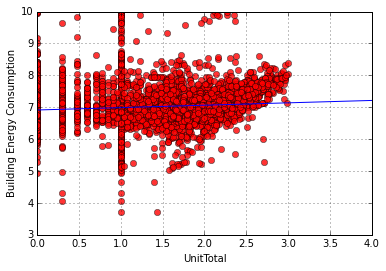

In [96]:
#plot the fit line
xline = np.arange(0,5)
yline = myfit.params[1]*xline + myfit.params[0]
print len(xline)
plt.plot(X,Y,'ro', alpha = 0.8)
#plot the dots
plt.plot(xline, yline, 'b', )
plt.xlabel('UnitTotal')
plt.ylabel('Building Energy Consumption')
plt.grid()
plt.legend()

In [99]:
# fit x and y the other way around
# Xr = sm.add_constant(np.log10(BBLcut['Building Energy Consumption']))
# Yr = np.log10(BBLcut['UnitsTotal'])
# myfit1 = sm.OLS(Yr, Xr, missing='drop').fit() # ignores entires where x or y is NaN
# print myfit1.params
# myfit1.summary()
#Xr = sm.add_constant(BBLcut['Building Energy Consumption'].apply(log10))
# Yr = BBLcut['UnitsTotal'].apply(log10)
# Xr = BBLcut['Building Energy Consumption'].apply(log10)
# myfit1 = smf.ols(formula = 'Yr ~ Xr', data=data1).fit() # missing='drop').fit() # ignores entires where x or y is NaN
# print myfit1.summary()
# print myfit1.params
X2 = sm.add_constant(np.log10(BBLcut['Building Energy Consumption']))
Y2 = BBLcut['UnitsTotal'].apply(log10)
myfit2 = sm.OLS(Y2, X2, missing='drop').fit() # ignores entires where x or y is NaN
print myfit2.summary()

                            OLS Regression Results                            
Dep. Variable:             UnitsTotal   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     56.32
Date:                Wed, 14 Oct 2015   Prob (F-statistic):           7.26e-14
Time:                        02:47:44   Log-Likelihood:                -5105.9
No. Observations:                4956   AIC:                         1.022e+04
Df Residuals:                    4954   BIC:                         1.023e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------
const             

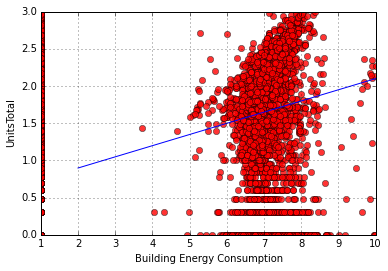

In [100]:
# change x and y and plot it again
xr = np.arange(2,11)
yr = myfit1.params[1]*xr + myfit1.params[0]
# print len(xline)
plt.plot(X2,Y2,'ro', alpha = 0.8)
#plot the dots
plt.plot(xr, yr, 'b', )
plt.xlabel('Building Energy Consumption')
plt.ylabel('UnitsTotal')
plt.grid()
plt.legend()

##The Energy vs Unit plot is better. I can't do a likelihood ratio test because the two models have the same degree of freedom. The likelihood ratio can only be done when the degrees of freedom are different.

In [108]:
# make a curve
Xr = BBLcut['UnitsTotal']
Yr = BBLcut['Building Energy Consumption']
data1 = pd.DataFrame()
data1['UT'] = Xr
data1['BEC'] = Yr
#w2, w1, w0 = np.polyfit(Xr, Yr, 2)
myfit3 = smf.ols(formula='Yr ~ Xr + I(Xr^2)', data = data1).fit()
myfit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Yr   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.474
Date:                Wed, 14 Oct 2015   Prob (F-statistic):             0.0843
Time:                        02:57:22   Log-Likelihood:            -1.0580e+05
No. Observations:                4956   AIC:                         2.116e+05
Df Residuals:                    4953   BIC:                         2.116e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   4.263e+07   8.29e+06      5.139      0.000      2.64e+07  5.89e+07
Xr          -6.61e+06   3.22e+06     -2.054      0.040     -1.29e+07 -3.02e+05
I(Xr ^ 2)   6.658e+06   3.22e+06      2.068      0.039      3.46e+05   1.3e+07
==============================================================================
Omnibus:                    10138.937   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         20748352.654
Skew:                          17.292   Prob(JB):                         0.00
Kurtosis:                     318.088   Cond. No.                         291.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

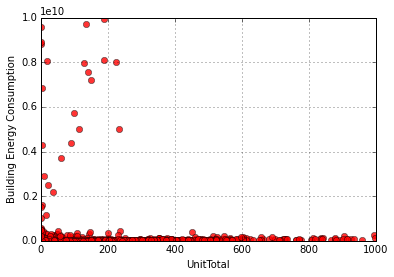

In [106]:
#plot it
xc = np.arange(0,5)
yc =w2*xc**2 + w1*xc + w0
plt.plot(Xr,Yr,'ro', alpha = 0.8)
plt.plot(xc,yc,'b', alpha = 0.8)
plt.xlabel('UnitTotal')
plt.ylabel('Building Energy Consumption')
plt.grid()
plt.legend()

In [226]:
# modelC = sm.OLS(Xr, Yr, missing='drop').fit()
# modelC.summary()
X = sm.add_constant(BBLcut['UnitsTotal'].apply(log10))
Y = BBLcut['Building Energy Consumption'].apply(log10)
x1 = BBLcut['UnitsTotal'].apply(log10)
data1 = pd.DataFrame()
data1['BEC'] = BBLcut['Building Energy Consumption']
data1['UT'] = BBLcut['UnitsTotal']
modelC = smf.ols(formula = 'Y ~ X^2+X', data=data1).fit() # missing='drop').fit() # ignores entires where x or y is NaN
print myfit.summary()
print myfit.params

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             UnitsTotal   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                 2.944e+04
Date:                Wed, 14 Oct 2015   Prob (F-statistic):               0.00
Time:                        00:04:18   Log-Likelihood:                -5114.8
No. Observations:                4956   AIC:                         1.023e+04
Df Residuals:                    4955   BIC:                         1.024e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------
Building Energy Consumption     0.2347      0.001    171.588      0.000         0.232     0.237
==============================================================================
Omnibus:                      888.088   Durbin-Watson:                   1.463
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1440.951
Skew:                          -1.238   Prob(JB):                         0.00
Kurtosis:                       3.922   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## According to the analysis, we still can't do the likelihood ratio test because the degree of freedom for the curve model is still 1.